# Problema de negócio

A base de dados desta análise provem do kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud. Este conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.
Este conjunto de dados apresenta transações ocorridas em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desbalanceado, a classe positiva (fraudes) responde por 0,172% de todas as transações.

Ele contém apenas variáveis de entrada numéricas que é o resultado de uma transformação pelo método análise de componentes principais (PCA). Assim as variáveis são apresentadas como: V1, V2, … V28 , as únicas variáveis que não foram transformadas com PCA são 'Time' e 'Amount'. característica 'Classe' é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.  
O objetivo é analisar os dados e desenvolver um modelo de machine learning capaz de prever transações fraudulentas com alta precisão, minimizando o número de falsos positivos para garantir a detecção efetiva de fraudes e assim, reduzir perdas financeiras.

# Importando bibliotecas

In [1]:
# bibliotecas para análise
import pandas as pd

# bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# preprocessamento dos dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

# algoritmos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier

# métricas
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve

# Carregando os dados

In [71]:
df = pd.read_csv('./Data/creditcard.csv')

In [ ]:
df.head(5)

# Análise exploratória

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Não há dados ausentes e todas as variáveis (exceto variável resposta como inteiro) estão adequadamente como numéricas contínuas

In [73]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Não se nota uma discrepancia visivel nas variaveis transformadas pelo PCA. Se observando 'Amount', que é o valor da transação, nota-se uma mediana menor que a média, esta última afetada pelos altos valores do último quartil, influenciand também no desvio padrão, mas a maioria dos valores são quantias baixas.

## Class

0    284315
1       492
Name: Class, dtype: int64


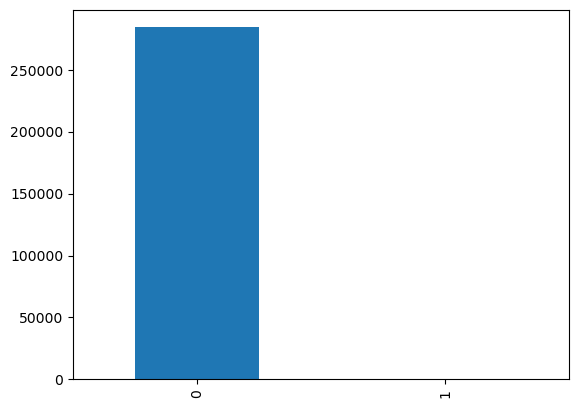

In [74]:
print(df['Class'].value_counts())
df['Class'].value_counts().plot.bar();

In [ ]:
perc_fraud = df[df['Class']== 1].shape[0]/df['Class'].shape[0]
print(f'{round(perc_fraud*100,4)}%')

Conforme o enunciado os dados de 'Class' são bem desbalanceados, vamos realizar um balanceamento dos dados para que o modelo não fique enviesado e não tenha capacidade de predizer as fraudes. As fraudes ocorreram em 0,17% das transações

## Time

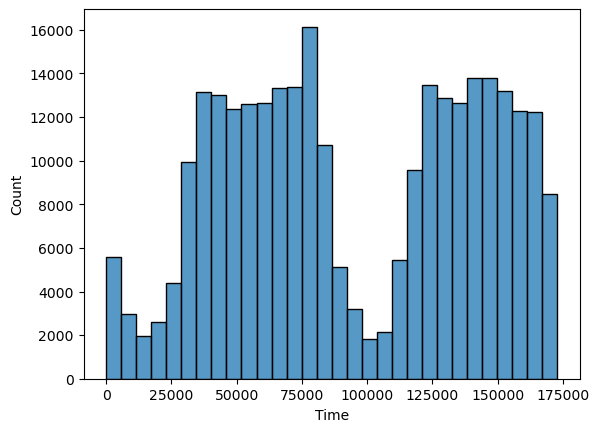

In [8]:
sns.histplot(df['Time'], bins = 30);

Vemos duas regiões de pico, se parecendo com uma distribuição bimodal se não fosse a região em torno de 75000 segundos, esse formato não deve-se alterar quando se relacionar 'Time' com 'Class' sendo não fraude (0). 

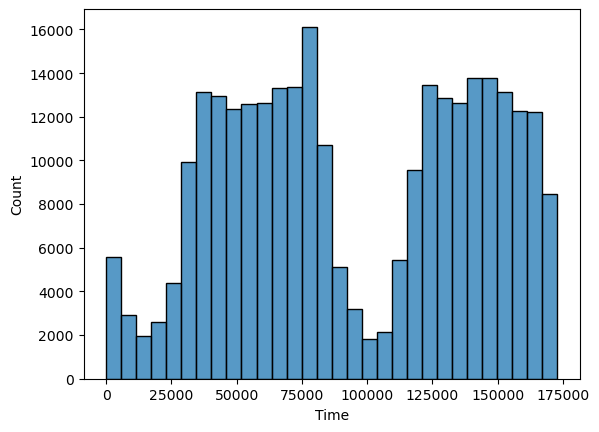

In [9]:
sns.histplot(df[df['Class'] == 0]['Time'], bins = 30);

In [ ]:
sns.histplot(df[df['Class'] == 1]['Time'], bins = 30);

As fraudes acontecem com frequencia em torno da região de 40000, que é uma faixa também alta em não fraude, e também em torno de 90000 região de menor frequencia nos casos de não fraude.

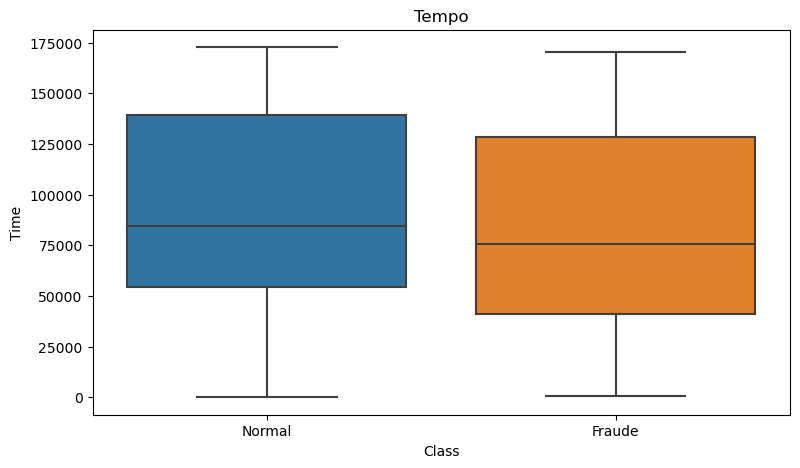

In [10]:
fig, ax = plt.subplots(figsize=(9, 5));
plt.title('Tempo')
sns.boxplot(data = df, x = 'Class', y = 'Time'); 
ax.set_xticklabels(['Normal', 'Fraude']);

Vemos no boxplot que a variável Time não se modifica muito sendo fraude ou não, as médias estão até proximas visualmente

## Amount

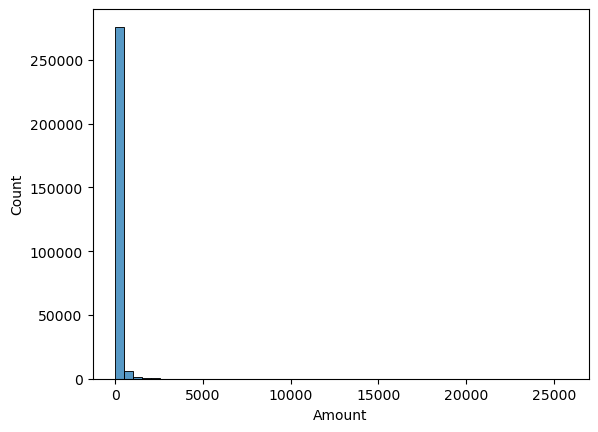

In [11]:
sns.histplot(df['Amount'], bins = 50);

In [ ]:
sns.histplot(df[df['Class'] == 0]['Amount'], bins = 10);

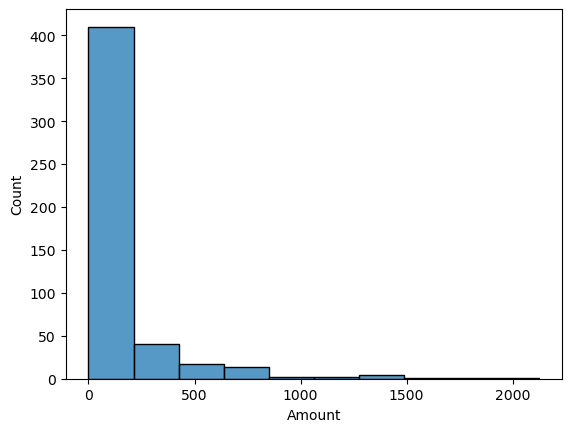

In [12]:
sns.histplot(df[df['Class'] == 1]['Amount'], bins = 10);

Nesta variável podemos extrair informação mais relevante: nota-se que a maioria das transações ocorrem até cerca de 2500 mas as fraudes ocorrem em valores bem menores, com maior frequencia abaixo de 250.

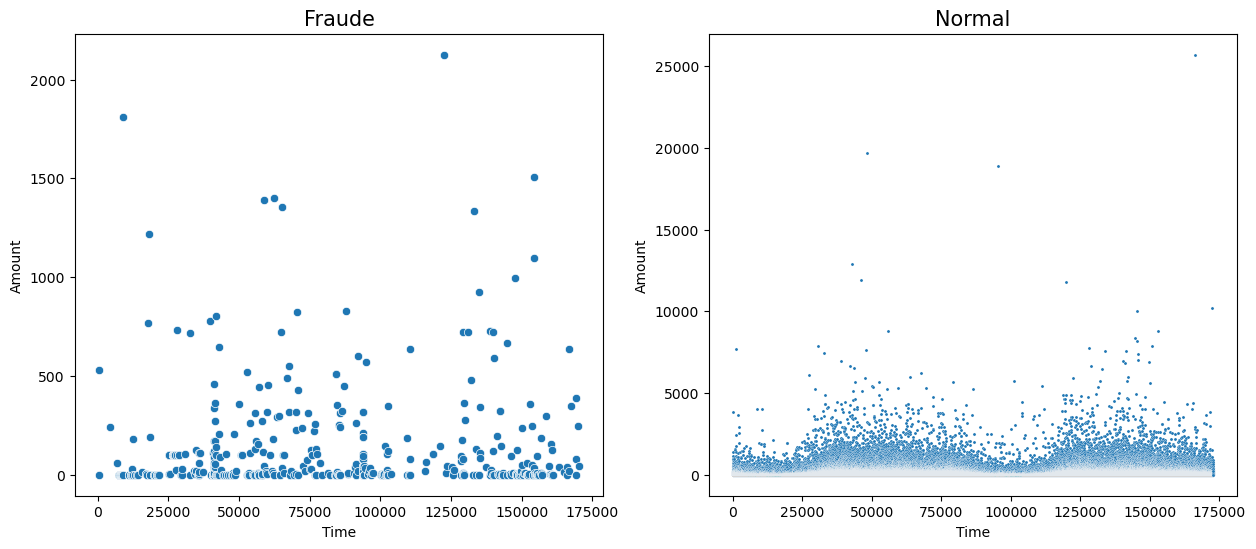

In [13]:
plt.subplots(figsize=(15,6))

plt.subplot(121)
plt.title('Fraude', fontsize= 15 );
sns.scatterplot(x = df[df['Class'] == 1]['Time'], y = df[df['Class'] == 1]['Amount']);

plt.subplot(122)
plt.title('Normal', fontsize= 15 );
sns.scatterplot(x = df[df['Class'] == 0]['Time'], y = df[df['Class'] == 0]['Amount'], s = 5);


Nestes gráficos de dispersão confirmamos que a tendência de fraude são em maioria para os menores valores ('Amount')

# Feature Enginering

Antes de de desenvolver o modelo preditivo vamos realizar uma transformação nas duas variáveis independentes analisadas, Time e Amount, certos algoritmos para convergirem melhor precisa que as variáveis estajam numa mesma escala. Vamos utilizar a padronização onde a média é 0 e o desvio padrão é 1, assim os outliers não são afetados.

In [93]:
df_standard = df.copy()

sc = StandardScaler()

df_standard['Time'] = sc.fit_transform(df_standard['Time'].values.reshape(-1,1))
df_standard['Amount'] = sc.fit_transform(df_standard['Amount'].values.reshape(-1,1))

df_standard.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


Como 'Class' é desbalanceada na divisão do treino e teste vamos utilizar o parametro stratify como True para que tenhamos uma proporção de exemplos de cada classe (Fraude e Não Fraude).

In [110]:
# separando dados de treino e o teste

X = df_standard.drop('Class', axis = 1)
y = df_standard['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state = 34)

In [109]:
"""X = df.drop('Class', axis = 1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state = 30)"""

"X = df.drop('Class', axis = 1)\ny = df['Class']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True, random_state = 30)"

# Balancamento dos dados

Os dados apresentam desbalanceamento, há muito mais amostras da classe 0 ( transação normal) o que favorece o modelo generalizar sobre esta classe majoritátia, e tendo pouca informação para encontrar o padrão que diferencia as classes, assim, vamos colocar técnicas de rebalancamento para que o modelo tenha dados suficientes para aprender sobre ambas as classes.   
Estudaremos o comportamento do modelo preditivo sem e com o rebalanceamento verificando sua performance e a efetiva contribuição da técnica para a aprendizagem.  
Vamos verificar as duas formas de balanceamento do dados, undersampling e oversampling e em cada uma utilizar dois algoritmos e analisar seus desempenhos nos modelos. 

### Undersampling 
* Random Undersampling - remove aleatoriamente observações da classe majoritária
* Near Miss - seleciona da classe majoritátia as observações de menor distância média dos K-vizinhos mais próximos.

In [77]:
# utilizando random undersampling
rus = RandomUnderSampler(random_state = 30)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

X_rus.shape, y_rus.shape

((738, 30), (738,))

In [78]:
y_rus.value_counts()

0    369
1    369
Name: Class, dtype: int64

In [79]:
# utilizando near miss
nm = NearMiss(version=1)
X_nm, y_nm = nm.fit_resample(X_train, y_train)

X_nm.shape, y_nm.shape

((738, 30), (738,))

In [ ]:
y_nm.value_counts()

### Oversampling 
consiste em criar sinteticamente novas observações da classe minoritária até qu
Método que cria novas observações aumentando o sinteticamente da classe minoritária até que haja equilíbrio entre as classes:    
* Random Oversampling - o contrário do random under sampling, cria observações copiando dados da classe minoritária
* SMOTE - consiste em criar novos dados da classe minoritária com base nos já existentes, cria amostras intermediárias entre dados reais. Também se utiliza do algoritmo KNN.

In [80]:
# utilizando random oversampling
ros = RandomOverSampler(random_state = 30)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

X_ros.shape, y_ros.shape

((426472, 30), (426472,))

In [81]:
y_ros.value_counts()

0    213236
1    213236
Name: Class, dtype: int64

In [82]:
# utilizando SMOTE
smote = SMOTE(random_state = 30)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

X_smote.shape, y_smote.shape

((426472, 30), (426472,))

In [83]:
y_smote.value_counts()

0    213236
1    213236
Name: Class, dtype: int64

# Modelos preditivos

### Regressão Logística

* **Modelo com base de dados desbalanceadas**

In [111]:
model_log = LogisticRegression(random_state = 30)
model_log.fit(X_train, y_train)
# Fazer previsões em cima de novos dados
y_pred_log = model_log.predict(X_test)


O próprio enunciado do kaggle recomenda utilizar a métrica AUPRC com os dados desbalanceados, esta é uma boa métrica para identificar os acertos na classe de positivos (valor 1 da classe, no caso a fraude)

In [112]:
# função para calcular AUPRC
def pr_auc(y_true, y_prob):
    precisao, recall, thresholds = precision_recall_curve(y_true, y_prob)
    return auc(recall, precisao)

In [113]:
# atribuindo a probabilidade de cada observação ser positivo
y_prob = model_log.predict_proba(X_test)[:, 1]
y_prob

array([1.32660991e-03, 6.00465932e-05, 3.85113542e-04, ...,
       8.42171031e-05, 1.16682212e-03, 1.20857551e-04])

In [114]:
# calculo do AUPRC
pr_auc(y_test,y_prob)

0.7269594536855527

In [115]:
def matriz_conf(y, y_pred):
    from mlxtend.plotting import plot_confusion_matrix
    from sklearn.metrics import confusion_matrix
    from matplotlib import pyplot as plt
    cm = confusion_matrix(y, y_pred)

    plot_confusion_matrix(conf_mat=cm)
    plt.show()

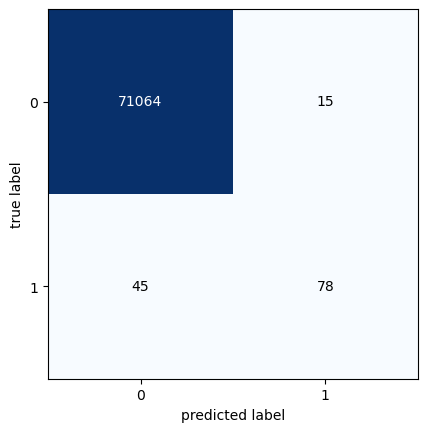

In [116]:
matriz_conf(y_test, y_pred_log)

O modelo prevê bem as transações comuns, mas nas fraudes acontecem muitos falsos negativos (classificado como normal mas é fraude). A métrica de 72 não pé boa. Vamos verificar com os dados balanceados

* **Modelo com base de dados aplicado o random undersampling**

Para os dados balanceados vamos utilizar a área sobre a curva (AUC) sobre a métrica ROC que objetiva verificar o comportamento do modelo com a proporção dos acertos da classe positivo em relação ao total de positivos pelos erros da classe positivo em relação ao total de negativos. Maiores explicações neste artigo que desenvolvi no Medium: https://medium.com/@paulinhomagno/a-curva-roc-k-17bdbcb1f8f4.
Nesta métrica o objetivo é ter um modelo próximo do valor 1, e levaremos em consideraçãor a matriz de confusão em busca de altos acertos dos positivos (fraudes) e poucos erros no falsos positivos.

In [117]:
model_log_rus = LogisticRegression(random_state = 30)

model_log_rus.fit(X_rus, y_rus)

y_pred_rus = model_log_rus.predict(X_test)


In [118]:
y_proba_rus = model_log_rus.predict_proba(X_test)[:,1]

In [119]:
roc_auc_score(y_test, y_proba_rus)


0.9804254215251391

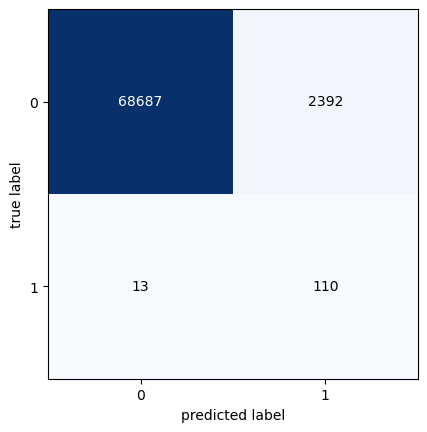

In [120]:
matriz_conf(y_test, y_pred_rus)

O modelo alcança excelente métrica, acerta muitos positivos mas, ao mesmo tempo, classifica muitos positivos erroneamente. Talvez, com ajustes nos hiperparâmetros se consiga uma melhora mas, vamos verificar o modelo com a outra tecnica de undersampling

* **Modelo com base de dados aplicado o NearMiss**

In [121]:
model_log_nm = LogisticRegression(random_state = 30)

model_log_nm.fit(X_nm, y_nm)

y_pred_nm = model_log_nm.predict(X_test)

In [122]:
y_proba_nm = model_log_nm.predict_proba(X_test)[:,1]

0.9213594583926256


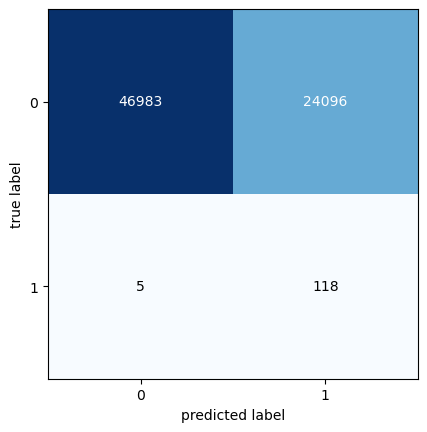

In [123]:
print(roc_auc_score(y_test, y_proba_nm))
matriz_conf(y_test, y_pred_nm)

O modelo teve acertos nas fraudes semelhante ao random undersampling mas, errou mais da metade classificando como fraude transações que não são. Provalvelmente, a técnica utilizada de selecionar os vizinhos mais próximos da classe majoritária tenha resultado em perda de informação na classificação desta.

* **Modelo com base de dados aplicado o random oversampling**

In [63]:
model_log_ros = LogisticRegression(random_state = 30)

model_log_ros.fit(X_ros, y_ros)

y_pred_ros = model_log_ros.predict(X_test)

y_proba_ros = model_log_ros.predict_proba(X_test)[:,1]

0.9917872212951648


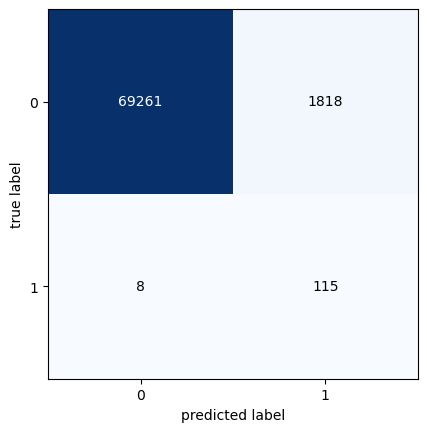

In [64]:
print(roc_auc_score(y_test, y_proba_ros))
matriz_conf(y_test, y_pred_ros)

Os modelos de rebalanceamento aleatório se sairam bem, este acerta bem as fraudes e reduziu os falsos negativos, é a melhor métrica, com 97,9.

* **Modelo com base de dados aplicado o SMOTE**

In [65]:
model_log_smote = LogisticRegression()

model_log_smote.fit(X_smote, y_smote)

y_pred_smote = model_log_smote.predict(X_test)

y_proba_smote = model_log_smote.predict_proba(X_test)[:,1]

0.9921589592800499


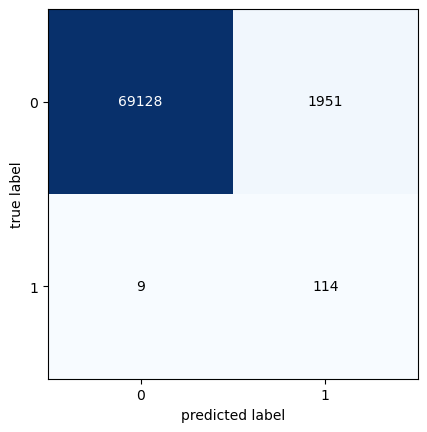

In [66]:
print(roc_auc_score(y_test, y_proba_smote))
matriz_conf(y_test, y_pred_smote)

Este teve um acerto semelhante ao random oversampling com métrica semelhante, mas teve um pequeno aumento nos falsos negativos

É utilizado a métrica e a matriz da confusão para se ter a noção dos acertos das classes e se focando nas fraudes (positivos). Mas, o melhor ou pior modelo pode ser subjetivo, pode-se ter diferentes visões e foco para este tipo de problema

### Modelos com árvores de decisão

Vamos analisar os mesmos dados anteriores mas com algoritmos baseados em arvores de decisão.

#### Random Forest

* **Modelo com base de dados desbalanceada**

In [67]:
model_rfc = RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state = 30)
model_rfc.fit(X_train, y_train)
# Fazer previsões em cima de novos dados
y_pred_rfc = model_rfc.predict(X_test)
y_proba_rfc = model_rfc.predict_proba(X_test)[:,1]

0.8368627661467324


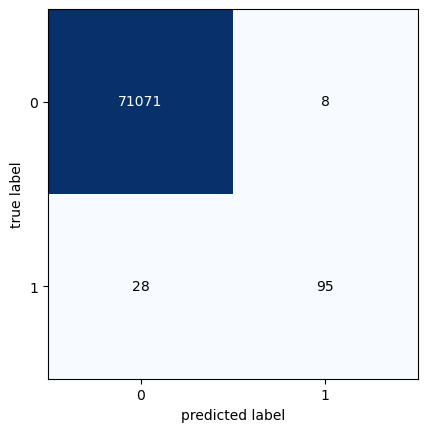

In [68]:
print(pr_auc(y_test, y_proba_rfc))
matriz_conf(y_test, y_pred_rfc)

Métrica razoável com muitos falsos negativos.

* **Modelo com base de dados o random undersampling**

In [69]:
model_rfc_rus = RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state = 30)

model_rfc_rus.fit(X_rus, y_rus)

y_pred_rus = model_rfc_rus.predict(X_test)

y_proba_rus = model_rfc_rus.predict_proba(X_test)[:,1]

0.9902433076582485


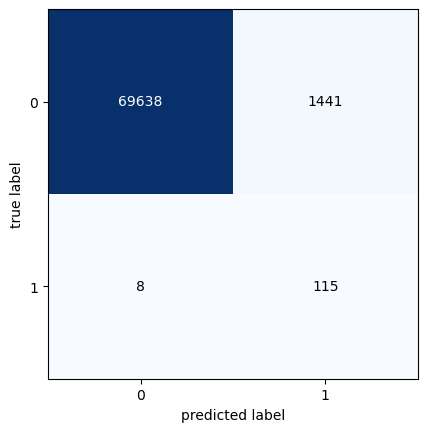

In [70]:
print(roc_auc_score(y_test, y_proba_rus))
matriz_conf(y_test, y_pred_rus)

Os dados com rebalanceamento aleatório estão contribuindo bem para o desempenho dos modelos, a métrica é excelente com bons números de falso negativos e falsos positivos, por esta análise este é o melhor modelo até então

* **Modelo com base de dados o Near Miss**

In [71]:
model_rfc_nm = RandomForestClassifier(max_depth = 3, n_estimators = 100, random_state = 30)

model_rfc_nm.fit(X_nm, y_nm)

y_pred_nm = model_rfc_nm.predict(X_test)

y_proba_nm = model_rfc_nm.predict_proba(X_test)[:,1]

0.9421955440168086


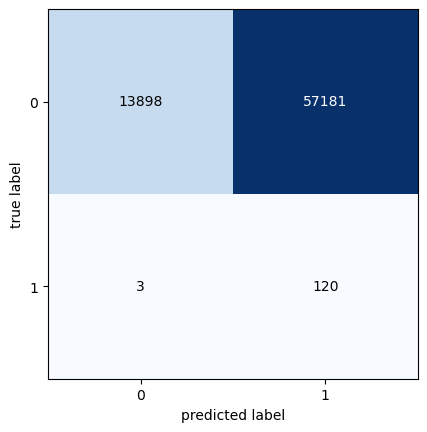

In [72]:
print(roc_auc_score(y_test, y_proba_nm))
matriz_conf(y_test, y_pred_nm)

O Near Miss vem se mostrando a pior técnica de balanceamento para estes dados, aqui influencia na performance para detectar as fraudes mas comprometendo todo resto, esta técnica fez com que o modelo perdesse informação para poder detectar os negativos (não fraude).

* **Modelo com base de dados o random oversampling**

In [73]:
model_rfc_ros = RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state = 30)

model_rfc_ros.fit(X_ros, y_ros)

y_pred_ros = model_rfc_ros.predict(X_test)

y_proba_ros = model_rfc_ros.predict_proba(X_test)[:,1]

0.9924868893731776


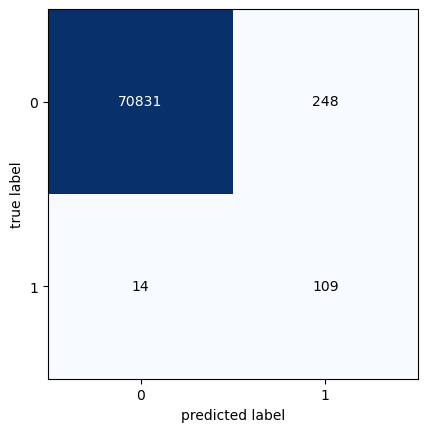

In [74]:
print(roc_auc_score(y_test, y_proba_ros))
matriz_conf(y_test, y_pred_ros)

Performance muito boa, métrica alta, e o modelo conseguiu detectar bem as fraudes sem comprometer muito os falsos positivos, sendo o melhor nisto até aqui.

* **Modelo com base de dados o SMOTE**

In [75]:
model_rfc_smote = RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state = 30)

model_rfc_smote.fit(X_ros, y_ros)

y_pred_smote = model_rfc_smote.predict(X_test)

y_proba_smote = model_rfc_smote.predict_proba(X_test)[:,1]

0.9765386435360998


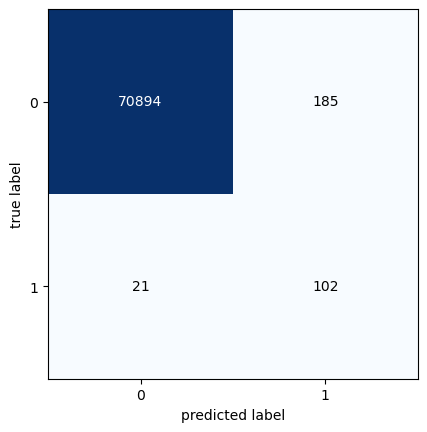

In [125]:
print(roc_auc_score(y_test, y_proba_smote))
matriz_conf(y_test, y_pred_smote)

Desempenho semelhante ao random oversampling. Estes dois tiveram performances semelhantes nos dois tipos de modelos de machine learning apresentados até aqui, mas, o random tem a premissa mais simples.

#### AdaBoostClassifier

* **Modelo com base de dados desbalanceada**

In [105]:
model = DecisionTreeClassifier(max_depth = 5, min_samples_split = 10, max_features = 'log2', random_state = 30)

model_adc = AdaBoostClassifier(base_estimator = model) 

model_adc.fit(X_train, y_train)

y_pred_adc = model_adc.predict(X_test)
y_proba_adc = model_adc.predict_proba(X_test)[:,1]

0.7973984036116325


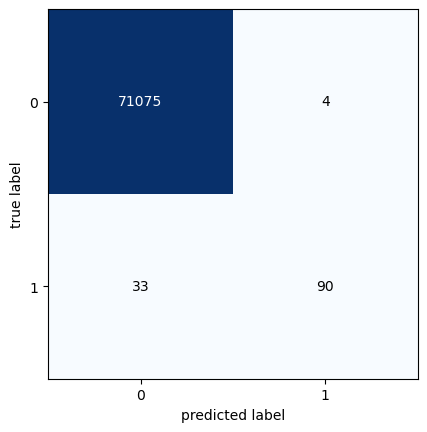

In [106]:
print(pr_auc(y_test, y_proba_adc))
matriz_conf(y_test, y_pred_adc)

O modelo se apresentou praticamente igual aos outros desbalanceados: aprende bem os padrões da classe dos negativos, mas é mediano na classificação das fraudes.

* **Modelo com base de dados aplicado o random undersampling**

In [111]:
model_adc_rus = AdaBoostClassifier(base_estimator = model) 

model_adc_rus.fit(X_rus, y_rus)

y_pred_rus = model_adc_rus.predict(X_test)
y_proba_rus = model_adc_rus.predict_proba(X_test)[:,1]

0.9738465742400217


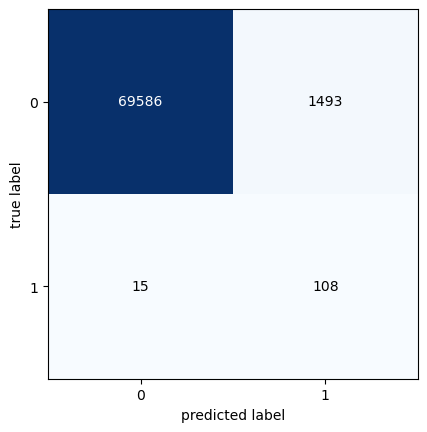

In [112]:
print(roc_auc_score(y_test, y_proba_rus))
matriz_conf(y_test, y_pred_rus)

Modelo desempenha bem mas, ainda não melhor que o do Random Forest

* **Modelo com base de dados aplicado o NearMiss**

In [113]:
model_adc_nm = AdaBoostClassifier(base_estimator = model) 

model_adc_nm.fit(X_nm, y_nm)

y_pred_nm = model_adc_nm.predict(X_test)
y_proba_nm = model_adc_nm.predict_proba(X_test)[:,1]

0.8853987839249515


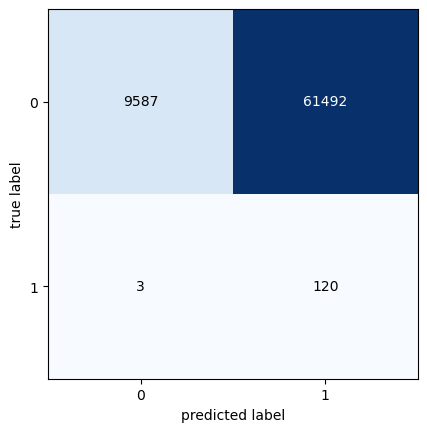

In [114]:
print(roc_auc_score(y_test, y_proba_nm))
matriz_conf(y_test, y_pred_nm)

Segue a mesma situação que os outros modelos com Near Miss: prejudica a classe de não fraude para acertar as fraudes

* **Modelo com base de dados aplicado o random oversampling**

In [115]:
model_adc_ros = AdaBoostClassifier(base_estimator = model) 

model_adc_ros.fit(X_ros, y_ros)

y_pred_ros = model_adc_ros.predict(X_test)
y_proba_ros = model_adc_ros.predict_proba(X_test)[:,1]

0.9356444912948687


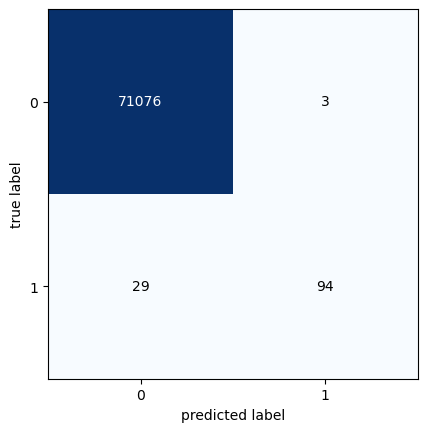

In [116]:
print(roc_auc_score(y_test, y_proba_ros))
matriz_conf(y_test, y_pred_ros)

Métrica alta mas com falsos negativos também alto

* **Modelo com base de dados aplicado o SMOTE**

In [117]:
model_adc_smote = AdaBoostClassifier(base_estimator = model) 

model_adc_smote.fit(X_smote, y_smote)

y_pred_smote = model_adc_smote.predict(X_test)
y_proba_smote = model_adc_smote.predict_proba(X_test)[:,1]

0.9484840925309603


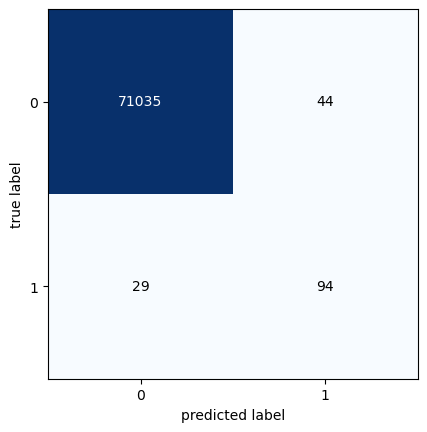

In [118]:
print(roc_auc_score(y_test, y_proba_smote))
matriz_conf(y_test, y_pred_smote)

Desempenho semelhante ao anterior mas com um pouco mais de erros nos falsos positivos

# Conclusão

### Modelos preditivos

Os algoritmos de arvore de decisão se mostraram melhor em dados desbalanceados
O balanceamento dos dados se mostrou muito importante para alcance de bons desempenhos dos modelos, nesta base de dados as tecnicas aleatórias (tanto undersampling como oversampling) mostraram bom impacto no aprendizado, com o SMOTE os resultados foram próximos ou iguais aos aleatórios; e o Near Miss, na versão 1, não se mostrou uma boa técnica para este problema, impactou negativamente para o aprendizado de fraude e não fraude. 
Os modelos com Random Forest foram os que desmontraram mais robustez no aprendizado, exceto com os dados aplicado o Near Miss, onde foi o que mais sofreu impacto negativo na aprendizagem. 
Parece que há uma fronteira nos dados dividindo as fraudes e não fraudes, e o Near Miss apagou esta informação, fazendo com que os modelos não aprendessem o suficiente.

### Impactos no negócio

O modelo com Random Forest com o oversampling aleatório teve melhor eficiência e teria melhor aproveitamento para o negócio.  
Este modelo tem uma performance de 99,25% na métrica AUC, e detecta 88,61% das fraudes sem comprometer as transações normais, ou seja, haveria poucos casos em que classificaria como fraude transações não fraudulentas (0,34% de falsos negativos em relação ao total de transações não fraudulentas). Alguns modelos teriam uma acertividade maior de fraudes mas comprometendo as transações normais, assim, impactando negativamente o processo de compra do cliente e até em cancelamentos e churn.    
Como um exemplo, vamos considerar as transações dos dados de teste (71202) e um ticket médio de fraude de 1.420,00, se evitaria __352.160,00__ de prejuízo com fraudes, o que na prática seria um aumento do lucro.
